In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as k

In [ ]:
mnist = k.datasets.mnist
(x, y), _ = mnist.load_data()

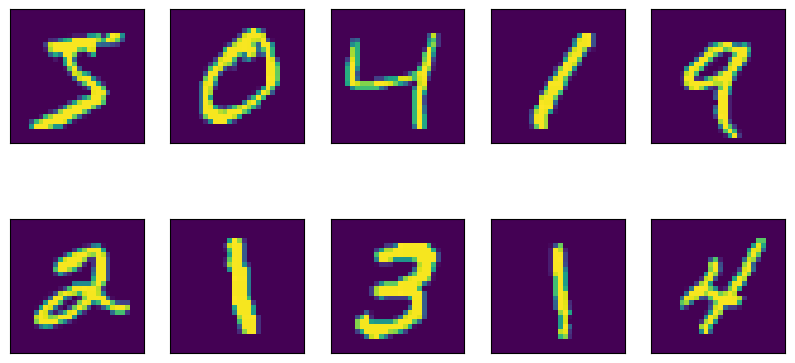

In [ ]:
import matplotlib.pyplot as plt

x = x / 255.0

f = plt.figure(figsize=(10, 5))
nrows, ncols = 2, 5
axs = f.subplots(nrows, ncols)

for i in range(10):
  ax = axs[i // ncols, i % ncols]
  ax.matshow(x[i, ...])
  ax.set_xticks([])
  ax.set_yticks([])

f.show()

In [ ]:
print(f'y: {np.unique(y)}')

y: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
x.shape

(60000, 28, 28)

In [ ]:
x = x.reshape(-1, x.shape[1] * x.shape[2])

In [ ]:
x.shape

(60000, 784)

In [ ]:
def plot_loss_acc(history):
  f = plt.figure(figsize=(15, 5))
  axs = f.subplots(1, 2)
  axs[0].plot(history.history['loss'])
  axs[1].plot(history.history['sparse_categorical_accuracy'])

  plt.tight_layout()

  for ax in axs.ravel():
    ax.grid(True)

In [ ]:
k.backend.clear_session()
model = k.models.Sequential([
    k.layers.Dense(8, activation = k.activations.relu, input_shape = [x.shape[1]]),
    k.layers.Dense(16, activation = k.activations.relu),
    k.layers.Dense(np.unique(y).shape[0], activation = k.activations.softmax)
])
model.summary()
model.save_weights('init_weights.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 6594 (25.76 KB)
Trainable params: 6594 (25.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = k.optimizers.SGD(),
              loss = k.losses.sparse_categorical_crossentropy,
              metrics = [k.metrics.sparse_categorical_accuracy])
history = model.fit(x, y, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2733 - sparse_categorical_accuracy: 0.5846
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4941 - sparse_categorical_accuracy: 0.8603
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3951 - sparse_categorical_accuracy: 0.8906
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3570 - sparse_categorical_accuracy: 0.9002
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3344 - sparse_categorical_accuracy: 0.9052
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3189 - sparse_categorical_accuracy: 0.9097
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3060 - sparse_categorical_accuracy: 0.9136
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2958 - sparse_categorical_accuracy: 0.9165
Epoch 9/10
1875/1875 [==========

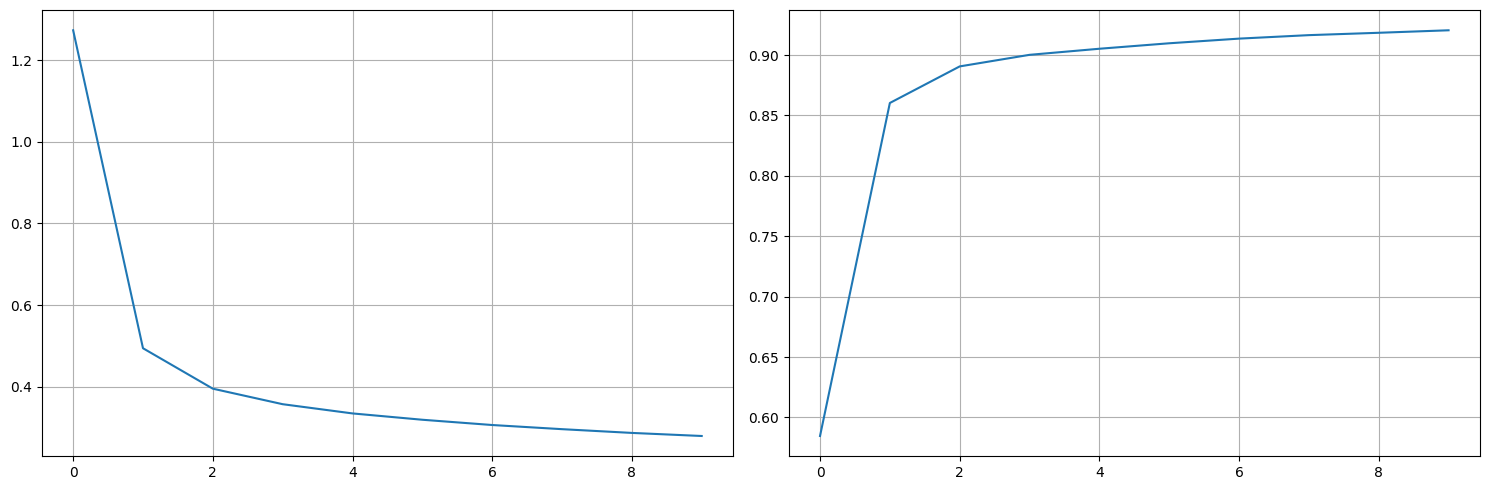

In [ ]:
plot_loss_acc(history)

In [ ]:
model.load_weights('init_weights.h5')

# With Momentum
model.compile(optimizer = k.optimizers.SGD(momentum = 0.9),
              loss = k.losses.sparse_categorical_crossentropy,
              metrics = [k.metrics.sparse_categorical_accuracy])
history = model.fit(x, y, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5200 - sparse_categorical_accuracy: 0.8369
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3263 - sparse_categorical_accuracy: 0.9011
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - sparse_categorical_accuracy: 0.9108
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2757 - sparse_categorical_accuracy: 0.9172
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2625 - sparse_categorical_accuracy: 0.9216
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2510 - sparse_categorical_accuracy: 0.9247
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2453 - sparse_categorical_accuracy: 0.9265
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2394 - sparse_categorical_accuracy: 0.9276
Epoch 9/10
1875/1875 [==========

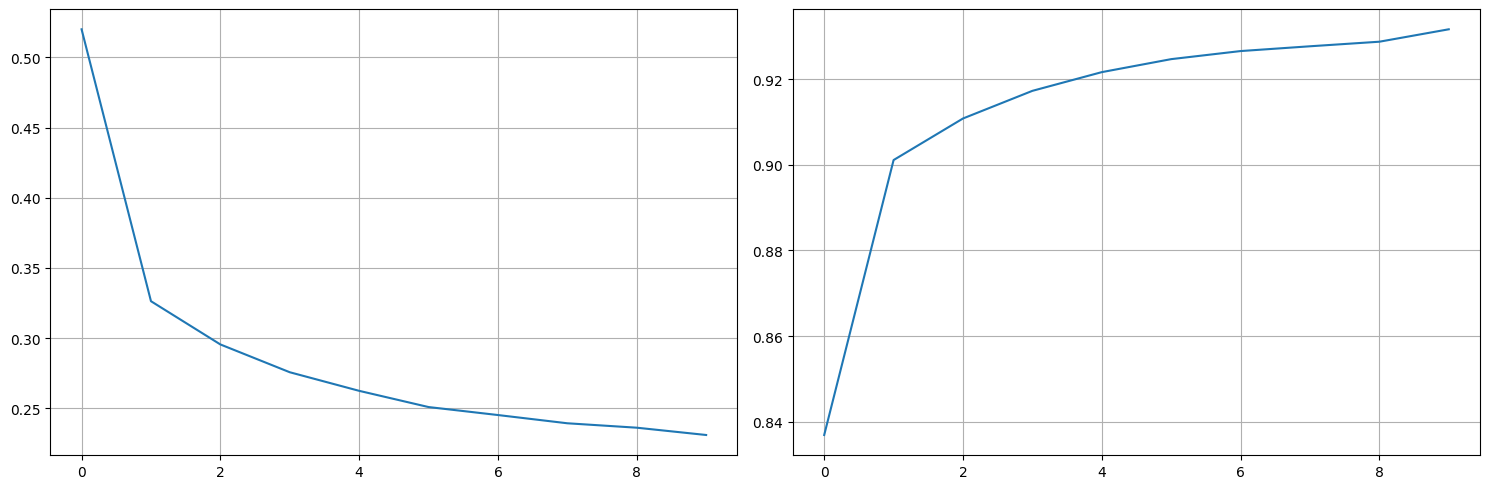

In [ ]:
plot_loss_acc(history)